In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('Files/linear.csv')
df.head()

,x,y
0,0.000000,-51.000000
1,25.000000,-12.000000
2,117.583220,134.907414
3,108.922466,134.085180
4,69.887445,NaN


##### Remove missing or impute values

In [3]:
# Look at the shape of dataframe
df.shape

(102, 2)

In [4]:
# There are missing values in the y column which is what we will predict
df.isnull().sum()

x    0
y    8
dtype: int64

In [5]:
# Remove entire rows from dataframe if they contain any nans or 'all'
# this may not be the best strategy for our dataset
df = df.dropna(how = 'any')
df.isnull().sum()

x    0
y    0
dtype: int64

In [6]:
df.shape

(94, 2)

##### Arrange Data into Features Matrix

In [7]:
# Convert x column to numpy array
X = df.loc[:, ['x']].values

In [8]:
X.shape

(94, 1)

In [11]:
y = df.loc[:, 'y'].values
y.shape

(94,)

### Linear Regression

In [14]:
# from sklearn.linear_model import LinearRegression

In [12]:
reg = LinearRegression(fit_intercept=True)

In [13]:
reg.fit(X, y)

LinearRegression()

In [14]:
# Predict for One Observation
reg.predict(X[0].reshape(-1,1))

array([-50.99119328])

In [15]:
# Predict for Multiple Observation at once
reg.predict(X[0:10])

array([-50.99119328, -11.39905237, 135.223663  , 121.50775193,
       102.37289634,  31.0056196 ,   4.46431068,  74.84474012,
        20.82088826,  72.16749711])

##### Measuring Model Performance

In [22]:
score = reg.score(X, y)
print(score)

0.979881836115762


In [16]:
reg.coef_  
# Jak znienia się y w odpowiedzi na zmiany x. 
# Np. każda dodatkowa godzina nauki jest związana ze wzrostem przewidywanej oceny o 1.58.

array([1.58368564])

In [17]:
reg.intercept_
# W praktyce, to jest punkt, w którym linia regresji przecina oś Y. Punkt zerowy

-50.99119328333397

In [18]:
m = reg.coef_[0]
b = reg.intercept_
# Following sloo intercept form
print('formula: y = {:.2f}x + {:.2f}'.format(m, b))

formula: y = 1.58x + -50.99


### Plotting the best fit Linear Regression Line in red

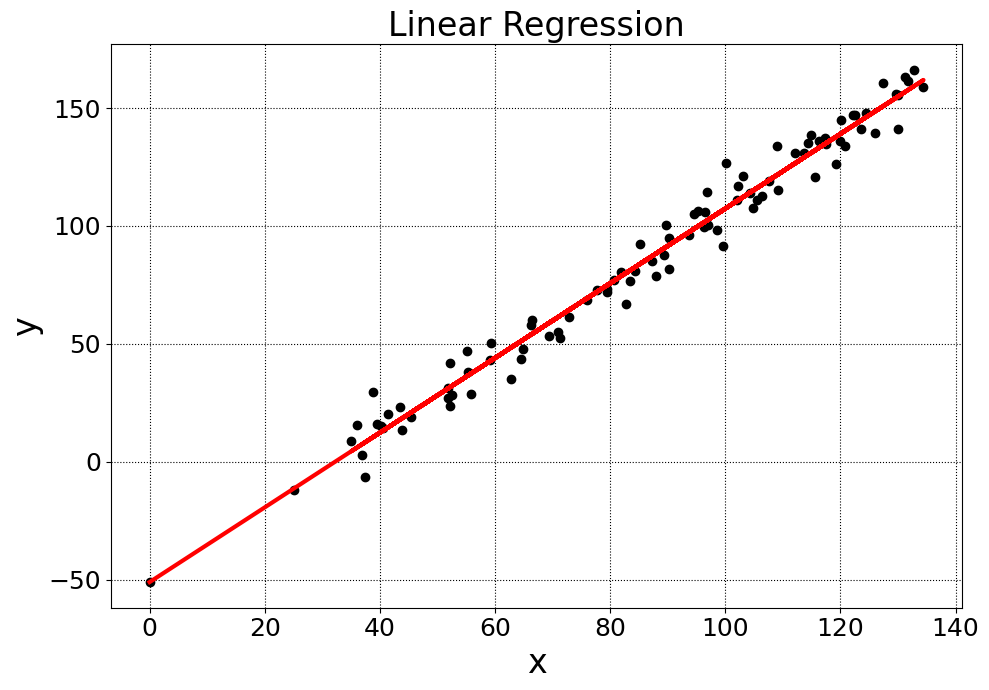

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.scatter(X, y, color='black');
ax.plot(X, reg.predict(X), color='red', linewidth=3);
ax.grid(True,
       axis = 'both',
       zorder = 0,
       linestyle = ':',
       color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('x', fontsize = 24)
ax.set_ylabel('y', fontsize = 24)
ax.set_title('Linear Regression', fontsize = 24)
fig.tight_layout()

### Plotting Models with or without Intercept

In [20]:
reg_inter = LinearRegression(fit_intercept=True)
reg_inter.fit(X, y)
predictions_inter = reg_inter.predict(X)
score_inter = reg_inter.score(X, y)

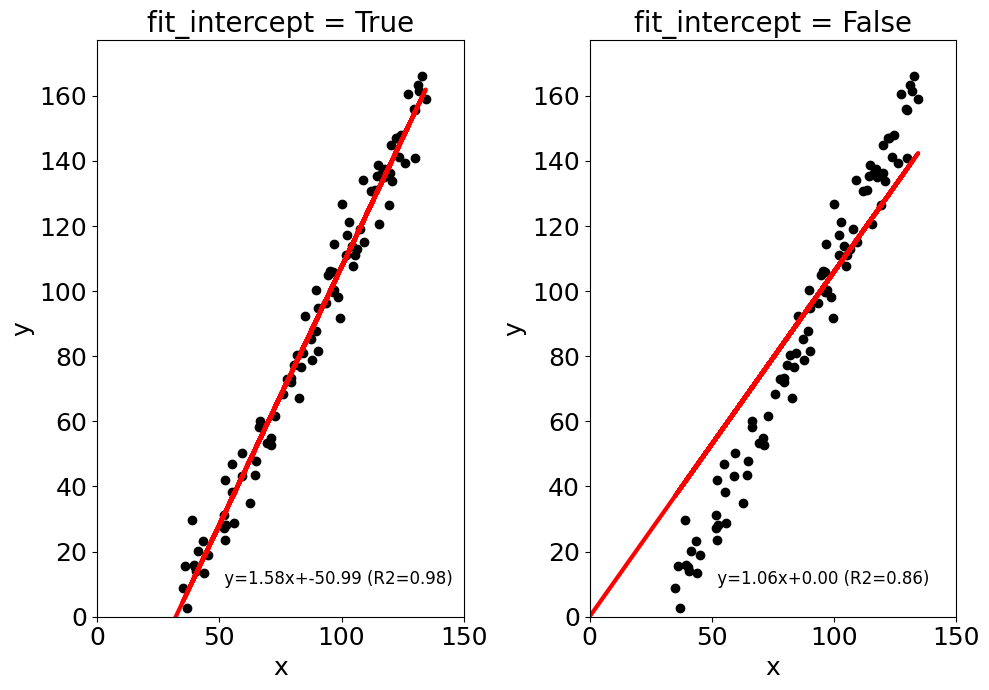

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,7));

for index, model in enumerate([LinearRegression(fit_intercept=True), LinearRegression(fit_intercept=False)]): 
    model.fit(X,y)
    predictions = model.predict(X)
    score = model.score(X, y)
    m = model.coef_[0]
    b = model.intercept_
    
    ax[index].scatter(X, y, color='black');
    ax[index].plot(X, model.predict(X), color='red',linewidth=3);

    ax[index].tick_params(labelsize = 18)
    ax[index].set_xlabel('x', fontsize = 18)
    ax[index].set_ylabel('y', fontsize = 18)
    ax[index].set_xlim(left = 0, right = 150)
    ax[index].set_ylim(bottom = 0)
    
    ax[index].text(50, 10, " y={:.2f}x+{:.2f} (R2={:.2f})".format(m, b, score), fontsize = 12)

ax[0].set_title('fit_intercept = True', fontsize = 20)   
ax[1].set_title('fit_intercept = False',  fontsize = 20)    
fig.tight_layout()